## Wine Quality Data Set Analysis

**Dataset:** Wine Quality Data Set

**Source:** https://archive.ics.uci.edu/ml/datasets/Wine+Quality

**Dataset features:**
- 1 - fixed acidity 
- 2 - volatile acidity 
- 3 - citric acid 
- 4 - residual sugar 
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10 - sulphates 
- 11 - alcohol 
- 12 - quality (score between 0 and 10)

**Motivation & Hypothesis:**

Increasingly, buisinesses rely on data to drive important decisions. The Wine Quality Data Set contains different components to wine that affects the quality of the product, and can be used as an example of data-driven business decisions. For instance, using data on features like acidity or density on samples of wine, we can analyze and identify what features are important in creating a better product. 

From the analysis of this dataset, the goal is to perform EDA to gain an understanding of the data set and build a regression model that can be used to predict the quality of the wine. In this process, I hope to learn what aspects of a wine result in a better quality score. 

My hypothesis is that the residual sugar will be the highest impact feature in determining the quality of red wine. 


[Part 1: EDA](#part1)

[Part 2: Modeling](#part2)

<a id='part1'></a>

### Part 1: EDA

In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import warnings
from sklearn.linear_model import Lasso

In [2]:
#suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#import dataset into pandas dataframe
df = pd.read_csv('winequality-red.csv',delimiter=";")

#review first 5 rows of wine dataset 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#info for df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#summary statistics for df
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Summary of Data:
It is observed that the dataset contains no null/NA values for all column features, since it contains 1599 non-null rows, which is the total number of samples in the dataset. The data type for all variables is float, except quality being an int. The summary statistics show values like the mean, standard deviation, range, etc. Certain features have very low standard deviation, like density and pH, and some have relatively higher ones, like total sulfur dioxide. 

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

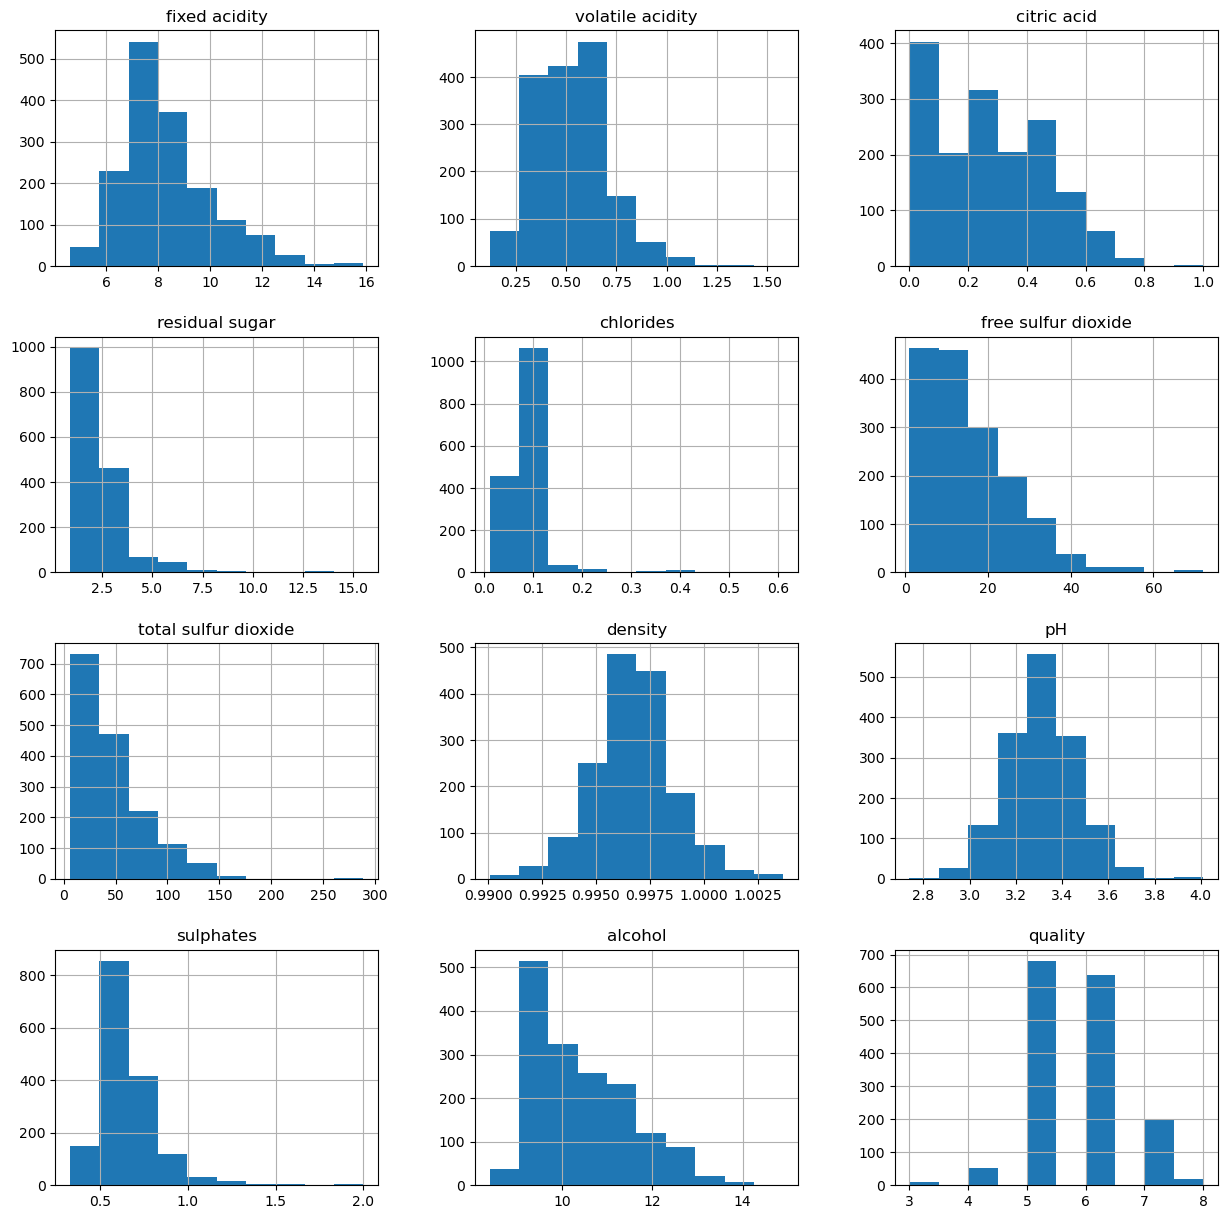

In [6]:
#histograms of data
df.hist(figsize=(15,15))

##### Histograms:
Most of the distributions are unimodal and right-skewed (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfer dioxide, sulphates, and alcohol). The density and pH distributions are symmetric.

Residual sugar, chlorides, and free sulfur dioxide are likely to have some outliers since there are bins far from the distribution peaks. 

Narrower distributions, like residual sugar and chlorides, indicate more frequent values at their respective distribution peaks. 

 It is observed that Quality is a variable with discrete values. Most wines have a quality score of 5 or 6.

In [7]:
#function for getting lower and upper bounds for outliers 
def bounds(column):
    q1,q3 = df[column].quantile([0.25,0.75])
    lb_fixed_acidity = q1 - (q3 - q1) * 1.5
    up_fixed_acidity = q3 + (q3 - q1) * 1.5
    return [lb_fixed_acidity,up_fixed_acidity]

#function for finding outliers for a dataframe column 
def outliers(column):
    b = bounds(column)
    outliers = df[(df[column]<b[0]) | (df[column]>b[1])][column]
    return outliers

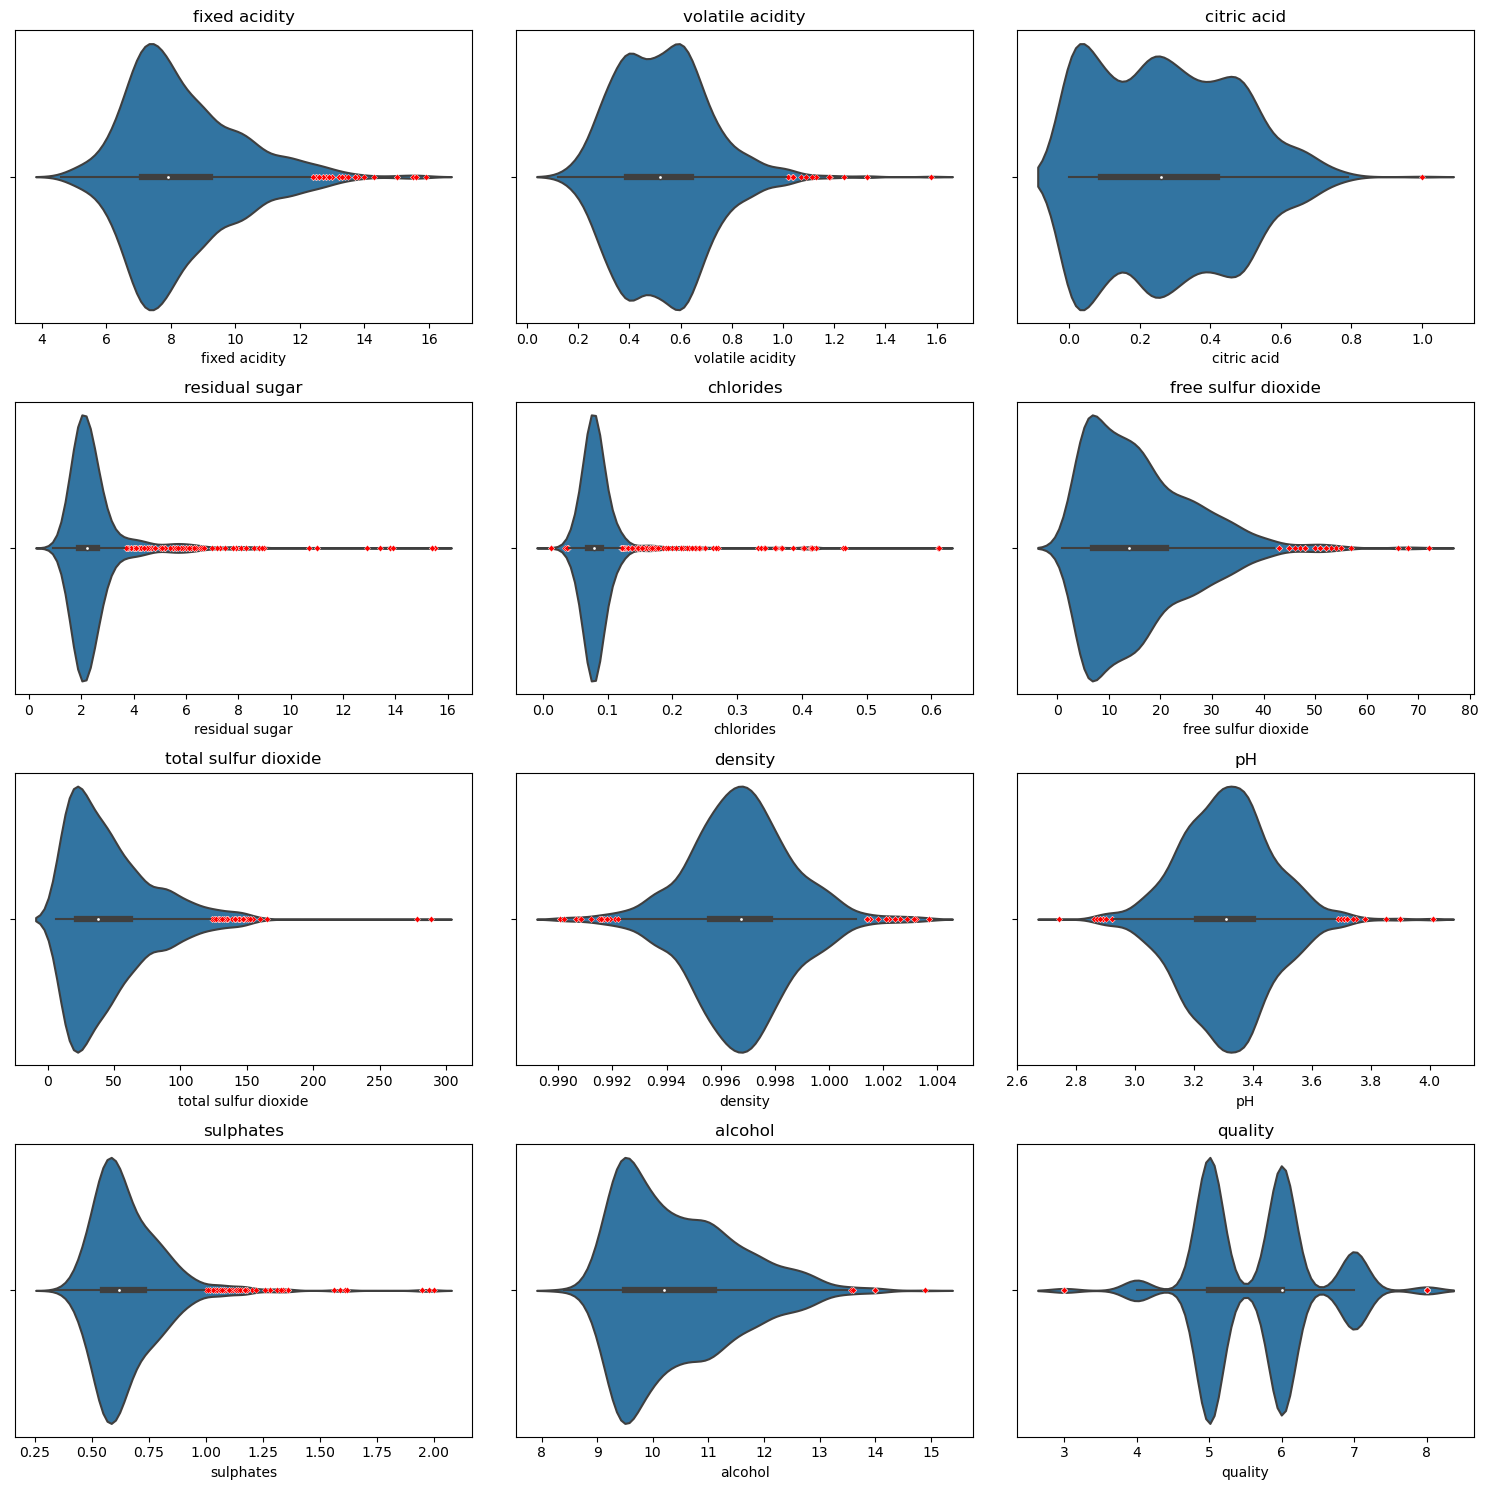

In [8]:
fig, ax = plt.subplots(4,3,figsize=(15,15))
ax = ax.ravel()
pos = 0
#plot violin plots with data points outside of the lower and upper bounds marked 
for column in df.columns:
    sns.violinplot(data = df, x = column, ax=ax[pos])
    sns.scatterplot(x=outliers(column),y=0,marker='D',color='red',ax=ax[pos],s=10)
    ax[pos].set_title(column)
    pos+=1

#formatting subplot
plt.tight_layout()
#remove unused subplot axes
#for i in range(38,42):
 #       plt.delaxes(ax[i])

##### Violin Plots:
The violin plots above display the distribution of the numerical data, along with datapoints that are outside of [q1 - (q3 - q1) * 1.5, q3 + (q3 - q1) * 1.5] bounds marked in red. These bounds are guidelines for identifying potential outliers, but analyzing the plots above indicate that we only should remove the very most extreme values for the following variables:

- volatile acidity 
- citric acid 
- residual sugar
- chlorides 
- free sulfur dioxide 
- total sulfur dioxide
- sulphates 
- alcohol

The majority of outliers being on the right side enforces the observation of right skewness in our histogram distributions. 

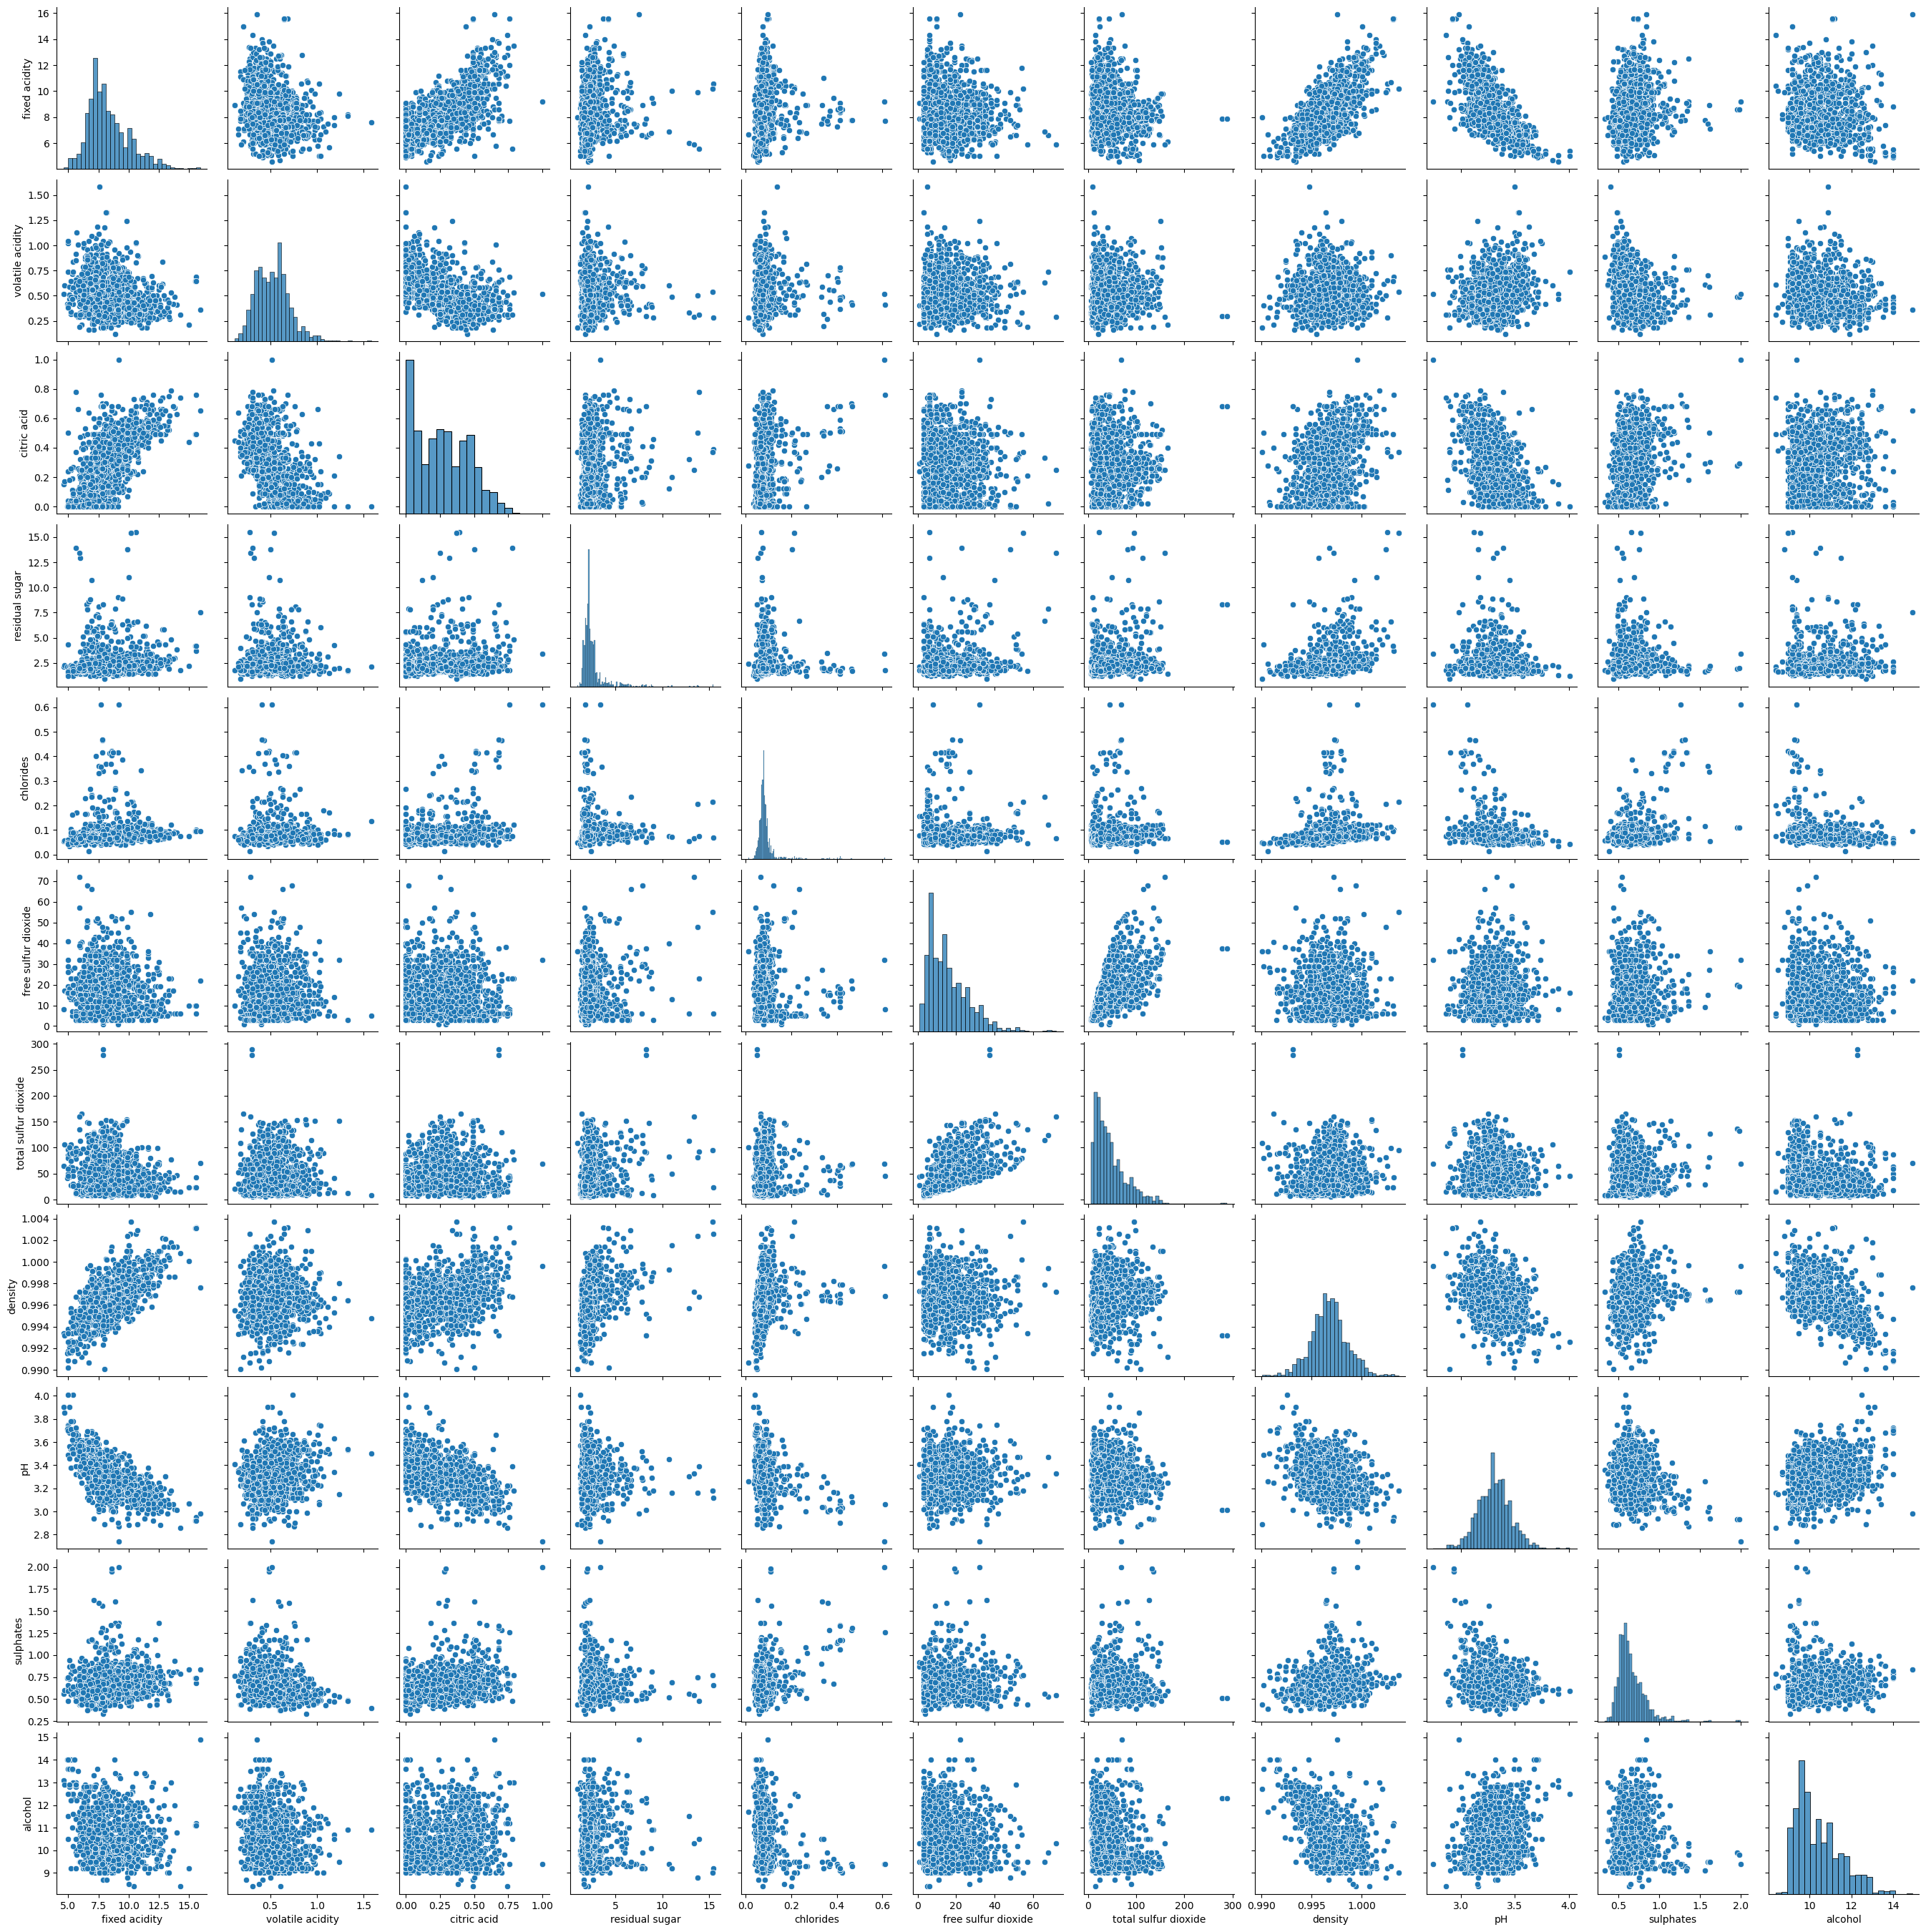

In [9]:
#Matrix of Scatter Plots
sns.pairplot(df.drop("quality",axis=1))

##### Matrix of Scatter Plots:
From the above matrix of scatter plots, there are no variables that are 100% correlated; therefore, we should not drop any columns during model feature selection. 

There are variables with relatively stronger correlations like fixed acidity and density or fixed acidity and pH. There are also variables with relatively low correlations like total sulfur dioxide and citric acid. A pearson correlation matrix will be used to review specific correlation values. 

In [10]:
#Removing outliers from dataset 
indices = df[(df['volatile acidity'] > 1.4) | (df['citric acid'] > 0.9)| (df['residual sugar'] > 10) | (df['chlorides'] > 0.3) | (df['free sulfur dioxide'] > 60) | (df['total sulfur dioxide'] > 200)| (df['sulphates'] > 1.5)| (df['alcohol'] > 13.5)].index
df.drop(indices,inplace=True)

##### Target Variable
The target variable for this analysis is quality. The dataset contains 11 different components of wine, which can affect the quality of the wine; therefore, we will be using these features to predict the quality of the wine. 

<AxesSubplot:>

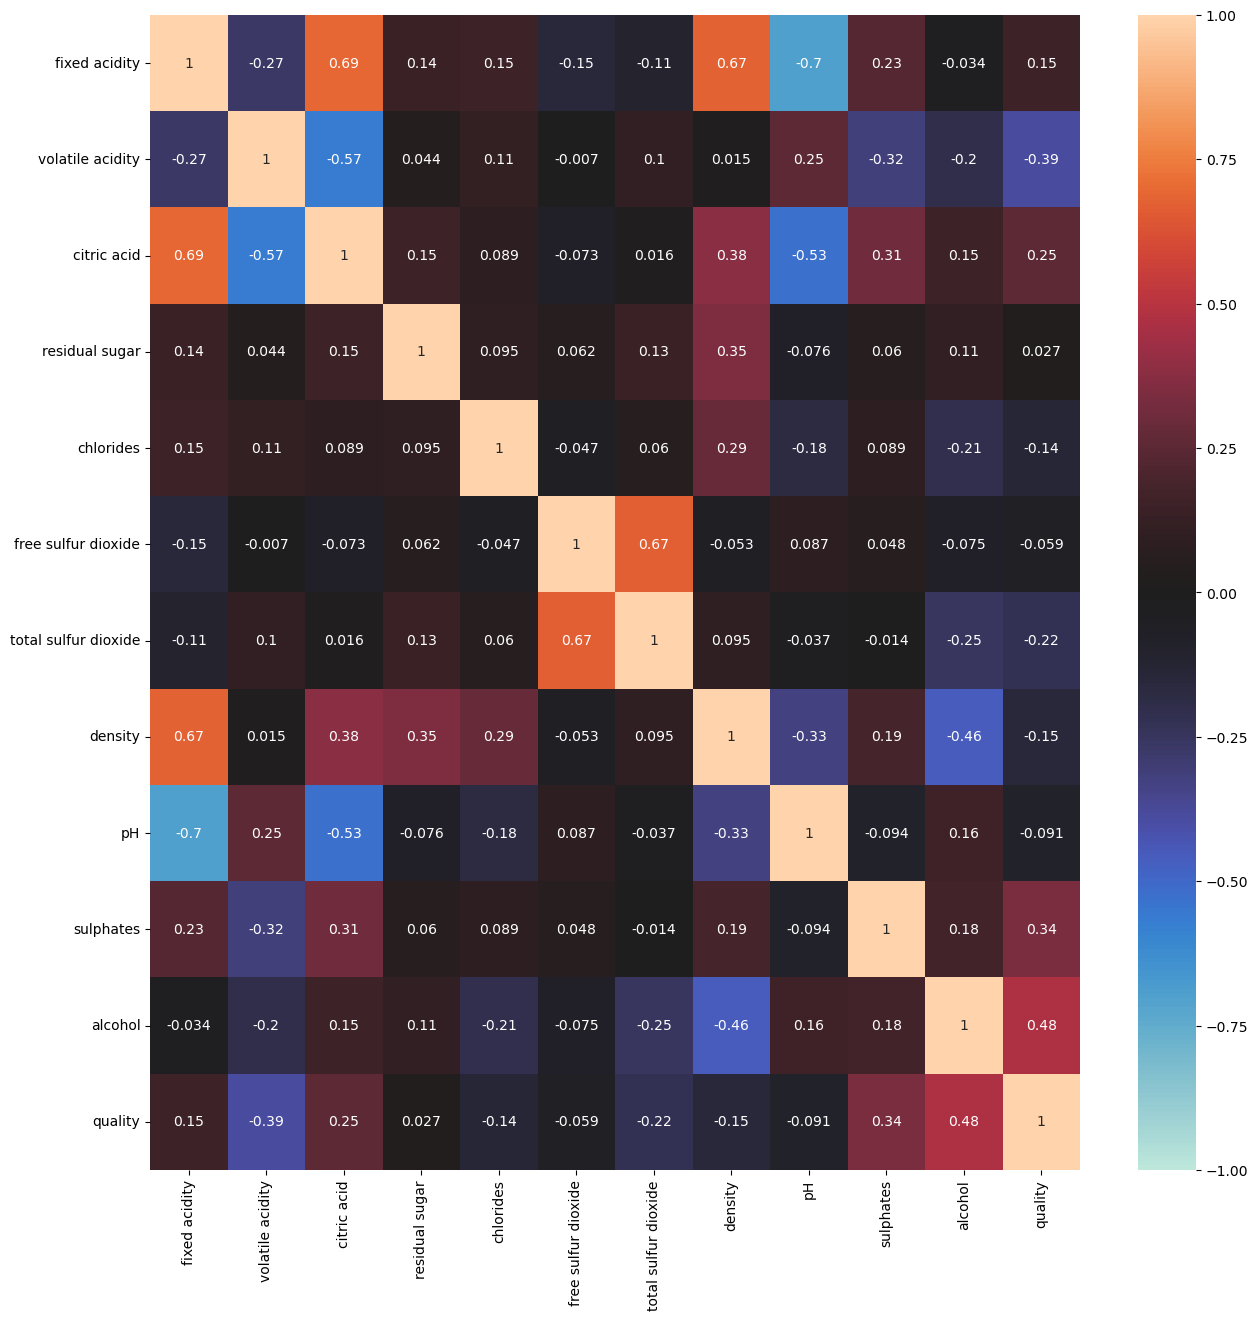

In [11]:
#Pearson Correlation Heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center = 0,ax=ax)

#####  Heat Map
The heat map of correlation coefficients show that the strongest positive correlation coefficient is between citric acid and fixed acidity and fixed acidity and density. The strongest negative correlation is between pH and fixed acidity. There are many more variable pairs that have weak correlations.

##### EDA Conclusions and Refined Hypothesis
Based on the correlation coefficient heat map, the variables that may potentially predict the target variable, quality, the best are alcohol and volatile acidity due to them having the highest correlation coefficients. The features that may predict it the worst are free sulfure dioxide and residual sugar. 

The features with distributions, shown in the histograms and violin plots, that have the smallest standard deviations/spread are also likely to not be the best at predicting quality, due to the majority of datapoints in the dataset having very similar values. These variables are residual sugars and chlorides. 

<a id='part2'></a>

### Part 2: Modeling

The response variable is quality, which describes the quality of the wine. A K-Nearest Neighbors Model will be used to predict the quality of the wine. 

##### Modeling Preprocessing

In [12]:
#Review Standard Deviation of Data
df.drop('quality',axis=1).describe().loc['std']

fixed acidity            1.730567
volatile acidity         0.178124
citric acid              0.191380
residual sugar           1.038293
chlorides                0.025000
free sulfur dioxide     10.009965
total sulfur dioxide    31.396892
density                  0.001814
pH                       0.149049
sulphates                0.139676
alcohol                  1.019479
Name: std, dtype: float64

In [13]:
df.drop('quality',axis=1).describe().loc[['min','max']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
min,4.6,0.12,0.00,0.9,0.012,1.0,6.0,0.99007,2.86,0.33,8.4
max,15.6,1.33,0.79,9.0,0.270,57.0,165.0,1.00320,4.01,1.36,13.5


After reviewing the standard deviation of the features, the min and max values, and histograms during EDA, it is observed that free sulfur dioxide, total sulfur dioxide, and fixed acidity have magnitudes and standard deviations that are very different to the other features. 

As a result, standardizing and normalizing the dataset will benefit the model performance. 

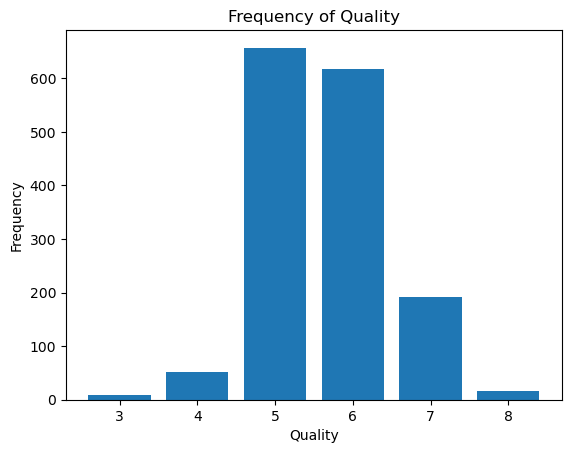

In [14]:
#Plot of how many wines are scored with each quality 
plt.bar(x = df['quality'].value_counts().index, height = df['quality'].value_counts());
plt.title('Frequency of Quality');
plt.xlabel('Quality');
plt.ylabel('Frequency');

Reviewing the frequency of quality in the dataset, it is observed that qualitys of 3, 4, and 8 are underrepresented. This underrepresentation will affect how well the model will be able to classify these specific labels. 

For the purposes of this analysis, quality will be split into two bins, where quality of 3 - 5 will be labeled as 0 (or low) and quality of 6 - 8 will be labeled as 1 (or high). This will result in a more balanced dataset to train the model on

In [15]:
# Grouping quality into two bins
df['quality'].replace([3,4,5],0,inplace=True)
df['quality'].replace([6,7,8],1,inplace=True)

##### KNN, All Features

In [16]:
#defining steps to the pipeline 
steps = [('scaler', StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=20))]

#create pipeline object 
pipeline = Pipeline(steps)

#split dataframe into X and y for train test splitting and modeling 
X = df.drop('quality',axis=1).values
y = df['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

#linear model scaled 
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
#classification report
print('Classification Report:\n ', classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.67      0.76      0.71       132
           1       0.80      0.72      0.76       177

    accuracy                           0.74       309
   macro avg       0.74      0.74      0.74       309
weighted avg       0.74      0.74      0.74       309



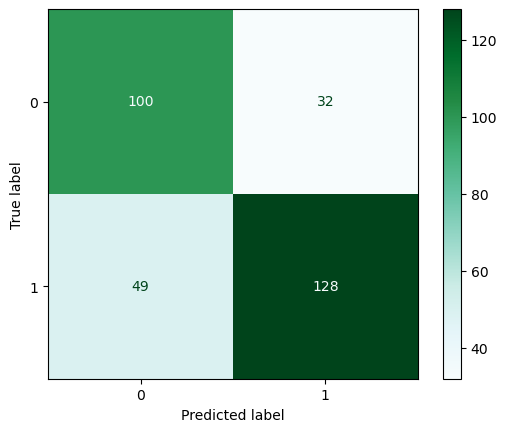

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot(cmap='BuGn')
plt.show()

The KNN model, utilizing all feaures in the dataset and a n_neighbors set to 20, does reasonably well at classifying the wine as good (quality = 1) or bad (quality = 0). 

* The accuracy of the model is 0.74, which indicates that it correctly classified about 3/4ths of the test dataset correctly. 

* The recall for label 1 is 0.72 and label 0 is 0.76. This percentage represents the percent of the predictions that were correct. 

* The precision for label 1 is 0.80 and label 0 is 0.67. This is the percent of the positive cases that were correctly classified. The model performs better at classifying label 1, which may be caused by a variety of factors. For example, there are more data points labeled as 1, so the model training for this particular label could be better. 

##### Feature Selection

The selected features that are used as the explanatory variables in a model can change the resultant model performance. 

For the analysis of this data set, the following feature selection methods are used:

* Removing 25% of the weakly correlated features to quality according to the correlation matrix
* Keeping only the top 2 features based on the correlation matrix
* Lasso feature selection 

In [19]:
#List of correlated features to quality 
corr_list = abs(df.corr()['quality']).sort_values().drop('quality')
corr_list

residual sugar          0.011029
pH                      0.026785
free sulfur dioxide     0.067898
chlorides               0.099143
fixed acidity           0.113234
density                 0.148001
citric acid             0.179675
total sulfur dioxide    0.260630
sulphates               0.299590
volatile acidity        0.322474
alcohol                 0.440433
Name: quality, dtype: float64

###### KNN, Removing 25% of the weakly correlated features

In [20]:
#Lowest correlated features being dropped rounded to the nearest whole num
lowest_corr_features = corr_list.head(round(len(corr_list)*0.25))
lowest_corr_features

residual sugar         0.011029
pH                     0.026785
free sulfur dioxide    0.067898
Name: quality, dtype: float64

In [21]:
#features being kept in the modeling
features = list(corr_list.drop(list(lowest_corr_features.keys())).keys())
features.append('quality')
#selecting features 
df_ = df[features]
df_.head()

,chlorides,fixed acidity,density,citric acid,total sulfur dioxide,sulphates,volatile acidity,alcohol,quality
0,0.076,7.4,0.9978,0.00,34.0,0.56,0.70,9.4,0
1,0.098,7.8,0.9968,0.00,67.0,0.68,0.88,9.8,0
2,0.092,7.8,0.9970,0.04,54.0,0.65,0.76,9.8,0
3,0.075,11.2,0.9980,0.56,60.0,0.58,0.28,9.8,1
4,0.076,7.4,0.9978,0.00,34.0,0.56,0.70,9.4,0


In [22]:
#defining steps to the pipeline 
steps = [('scaler', StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=20))]

#create pipeline object 
pipeline = Pipeline(steps)

#split dataframe into X and y for train test splitting and modeling 
X = df_.drop('quality',axis=1).values
y = df_['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

#linear model scaled 
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
#classification report
print('Classification Report:\n ', classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.67      0.73      0.70       132
           1       0.79      0.73      0.76       177

    accuracy                           0.73       309
   macro avg       0.73      0.73      0.73       309
weighted avg       0.74      0.73      0.74       309



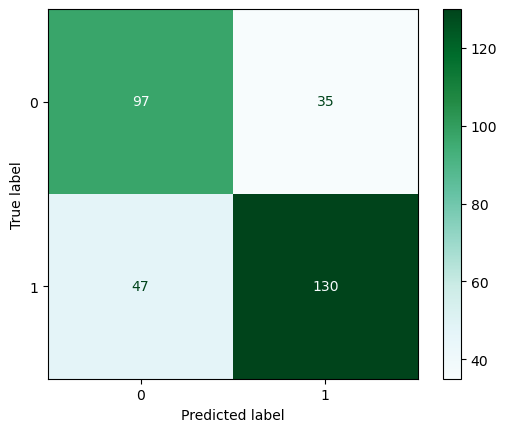

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot(cmap='BuGn')
plt.show()

Removing the 3 weakest correlated features (residual sugar, pH, free sulfur dioxide) from the model training resulted in very slight changes to the model performance. 

Precision for label 0 stayed the same, and precision and recall for label 1 changed by 0.01. The largest difference is the recall for label 0, which decreased from 0.76 to 0.73. This indicates that this model did slightly worse in predicted label 0 accurately.  

The model accuracy does decrease by 0.01, which may indicate that these three features play a role in helping the model classify the labels correctly. However, further analysis should be done to determine if this difference is statistically significant. 

##### KNN, Top 2 Correlated Features

In [25]:
#Highest correlated features
highest_corr_features = corr_list.tail(2)
highest_corr_features

volatile acidity    0.322474
alcohol             0.440433
Name: quality, dtype: float64

In [26]:
#features being kept in the modeling
features = list(highest_corr_features.keys())
features.append('quality')
#selecting features 
df_ = df[features]
df_.head()

,volatile acidity,alcohol,quality
0,0.70,9.4,0
1,0.88,9.8,0
2,0.76,9.8,0
3,0.28,9.8,1
4,0.70,9.4,0


In [27]:
#defining steps to the pipeline 
steps = [('scaler', StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=20))]

#create pipeline object 
pipeline = Pipeline(steps)

#split dataframe into X and y for train test splitting and modeling 
X = df_.drop('quality',axis=1).values
y = df_['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

#linear model scaled 
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
#classification report
print('Classification Report:\n ', classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.66      0.78      0.72       132
           1       0.81      0.70      0.75       177

    accuracy                           0.73       309
   macro avg       0.74      0.74      0.73       309
weighted avg       0.75      0.73      0.74       309



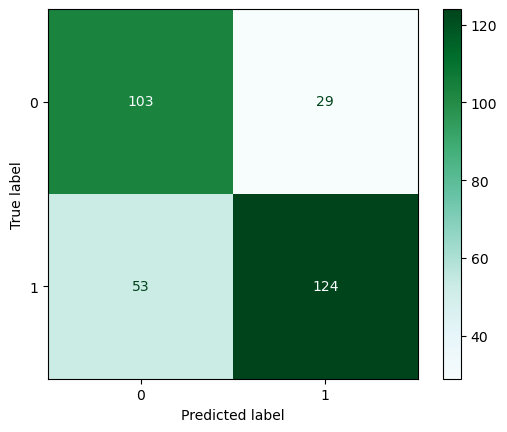

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot(cmap='BuGn')
plt.show()

Only using the top 2 correlated features, volatile acidity and alcohol, resulted in very slight changes to model performance as well.

The precision, recall, and model accuracy are different by only 0.01 to 0.02, where the the KNN model with two features resulted in a slightly lower model accuracy. However, we see that similar model performance can be achieved with just two features. Having less features in a model has advantages like the model being less disposed to being overfitted, faster training and computation time. 

##### KNN, Lasso Feature Selected

In [30]:
#features
X = df.drop('quality',axis=1).values
y = df['quality'].values

#standard scaler 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#split dataframe into X and y for train test splitting and modeling 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

#lasso 
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
coeff = abs(lasso.coef_)

df_coeff = pd.DataFrame({'Features':df.columns[:-1],'scores':coeff})
df_coeff.sort_values('scores',ascending=False)

,Features,scores
10,alcohol,0.161949
9,sulphates,0.084105
6,total sulfur dioxide,0.082108
1,volatile acidity,0.077331
5,free sulfur dioxide,0.024305
8,pH,0.006838
3,residual sugar,0.006114
0,fixed acidity,0.001649
2,citric acid,0.000000
4,chlorides,0.000000


Using Lasso, the most important features that were identified alcohol, sulphates, total sulfur dioxide, volatile acidity, and free sulfur dioxide since they have the highest scores.

In [31]:
#features being kept in the modeling
features = ['alcohol','sulphates','total sulfur dioxide','volatile acidity','free sulfur dioxide']
features.append('quality')
#selecting features 
df_ = df[features]

#defining steps to the pipeline 
steps = [('scaler', StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=20))]

#create pipeline object 
pipeline = Pipeline(steps)

#split dataframe into X and y for train test splitting and modeling 
X = df_.drop('quality',axis=1).values
y = df_['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

#linear model scaled 
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
#classification report
print('Classification Report:\n ', classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.68      0.80      0.74       132
           1       0.83      0.72      0.77       177

    accuracy                           0.75       309
   macro avg       0.75      0.76      0.75       309
weighted avg       0.77      0.75      0.76       309



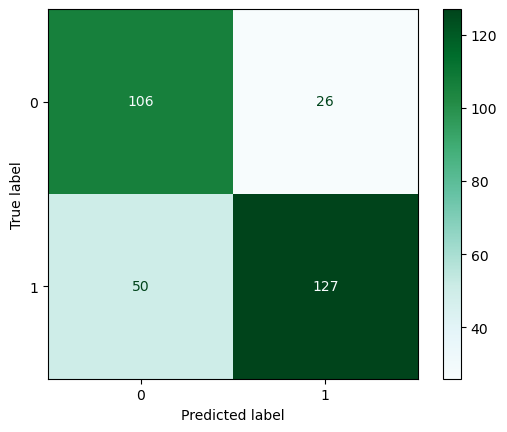

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot(cmap='BuGn')
plt.show()

Using Lasso for feature selection resulted in a slightly better performing model, when compared to the other iterations above. The precision, recall, and accuracy all increased for labels 0 and 1 when compared to the other model variations above. 

### Conclusion

Based on the feature selection above, we can conclude that a model with alcohol, sulphates, total sulfur dioxide, volatile acidity, and free sulfur dioxide resulted in the best performing model. These features are both higher correlated features (alcohol, volatile acidity) with the response variable and lower correlated features (free sulfur dioxide). As a result, it is not always the best to choose features by just looking at the correlation coefficient. 